In [59]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.layers import Embedding, Flatten,LSTM
from keras.optimizers import Adam,SGD
from keras.utils import np_utils
from keras.preprocessing.text import one_hot, Tokenizer
from keras.preprocessing.sequence import pad_sequences
import pickle as pickle

In [7]:
data = pd.read_csv('../data/uci-news-aggregator.csv')
len(data)

422419

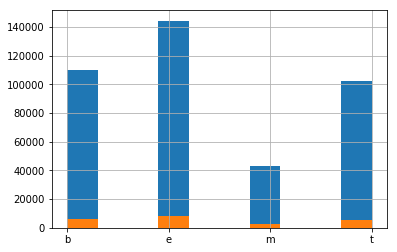

In [11]:
data = data.sample(frac=1.0)
data_train = data[['TITLE','CATEGORY']][0:400000]
data_test = data[['TITLE','CATEGORY']][400000:]

data_train['CATEGORY'].hist()
data_test['CATEGORY'].hist()


In [12]:
vocab_size = 1500
max_seq_len = 25
Hidden_1 = 128
Categories = 4
Optimizer = Adam()
Epochs = 3
Verbose = 1
Batch_size = 5000

In [21]:
tokenize = Tokenizer(num_words=vocab_size)
tokenize.fit_on_texts(data_train['TITLE'])
x_train = tokenize.texts_to_matrix(data_train['TITLE'])
x_test = tokenize.texts_to_matrix(data_test['TITLE'])
print(x_train[0])
y_train = pd.get_dummies(data_train['CATEGORY'])
y_test = pd.get_dummies(data_test['CATEGORY'])

[0. 0. 0. ... 0. 0. 0.]


In [39]:
model = Sequential()
model.add(Dense(512, input_shape=(vocab_size,)))
model.add(Activation('relu'))
model.add(Dense(Categories))
model.add(Activation('sigmoid'))
# compile the model
model.compile(optimizer=Optimizer, loss='categorical_crossentropy', metrics=['acc'])
# summarize the model
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 512)               768512    
_________________________________________________________________
activation_4 (Activation)    (None, 512)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 4)                 2052      
_________________________________________________________________
activation_5 (Activation)    (None, 4)                 0         
Total params: 770,564
Trainable params: 770,564
Non-trainable params: 0
_________________________________________________________________
None


In [40]:
# fit the model
model.fit(x_train, y_train, batch_size=Batch_size,epochs=Epochs, verbose=Verbose,validation_split=0.1)
# evaluate the model
loss, accuracy = model.evaluate(x_test, y_test, verbose= Verbose)
print('Accuracy: %f' % (accuracy*100))

Train on 360000 samples, validate on 40000 samples
Epoch 1/3
360000/360000 [==============================] - 37s 103us/step - loss: 0.5666 - acc: 0.8005 - val_loss: 0.3939 - val_acc: 0.8498
Epoch 2/3
360000/360000 [==============================] - 36s 100us/step - loss: 0.3802 - acc: 0.8563 - val_loss: 0.3748 - val_acc: 0.8590
Epoch 3/3
22419/22419 [==============================] - 2s 76us/step
Accuracy: 86.346403


In [61]:
model.save('../models/model_v1.1_sigmoid.h5')
# saving
with open('../models/tokenizer_v1.1_sigmoid.pickle', 'wb') as handle:
    pickle.dump(tokenize, handle, protocol=pickle.HIGHEST_PROTOCOL)


In [67]:
for i in range(30,35):
    pred = model.predict(np.array([x_test[i]]))
    print(data_test[i:i+1])
    print(pred.argmax())
   

                                                   TITLE CATEGORY
65130  Facebook starts work on drones to provide Inte...        t
3
                                                    TITLE CATEGORY
330087  Obamacare's 2015 Outlook Goes From Poor to Cri...        b
0
                                                  TITLE CATEGORY
307135  Siemens, Mitsubishi Improves Their Alstom Offer        b
0
                                                    TITLE CATEGORY
104053  Gossip site says Justin Bieber and Selena Gome...        e
1
                                                    TITLE CATEGORY
290342  UPDATE 1-Airbus, Safran team up on response to...        b
0
